Assignment
In this assignment, you'll continue working with the U.S. Education Dataset from Kaggle.

### 1. Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

In [0]:
# imports and environment
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sqlalchemy import create_engine
from scipy import stats
from scipy.stats.mstats import winsorize
import matplotlib.ticker as ticker
import warnings

In [0]:
# retrieving data
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

trying out a differnt way to clean up the data per the previous exampled solution: interpolate over the missing values and drop the remainder

In [0]:
edu_df2 = edu_df.copy()

columns = ['ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']

states = edu_df2['STATE'].unique()

for state in states:
  edu_df2.loc[edu_df2['STATE']==state, columns] = edu_df2.loc[edu_df2 ['STATE']==state,columns].interpolate()

In [0]:
edu_df2.dropna(inplace=True)

In [6]:
edu_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 54 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1046 non-null object
STATE                           1046 non-null object
YEAR                            1046 non-null int64
ENROLL                          1046 non-null float64
TOTAL_REVENUE                   1046 non-null float64
FEDERAL_REVENUE                 1046 non-null float64
STATE_REVENUE                   1046 non-null float64
LOCAL_REVENUE                   1046 non-null float64
TOTAL_EXPENDITURE               1046 non-null float64
INSTRUCTION_EXPENDITURE         1046 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1046 non-null float64
OTHER_EXPENDITURE               1046 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1046 non-null float64
GRADES_PK_G                     1046 non-null float64
GRADES_KG_G                     1046 non-null float64
GRADES_4_G                      1046 non-null float64
GRADES_8_G                      

Not sure why this was exampled as it drops about 400 rows, but I will continue anyway...

### 2. Derive the descriptive statistics of the data and discuss the points you find remarkable.


In [7]:
edu_df2.describe(include='all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1046,1046,1046.000000,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1.046000e+03,1046.000000,1046.000000,1046.000000,1046.000000,1046.000000,1.046000e+03,1.046000e+03,1.046000e+03,1046.000000,1046.000000,1046.000000,1046.000000
unique,1041,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2008_VIRGINIA,DISTRICT_OF_COLUMBIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2006.970363,9.312498e+05,1.016897e+07,8.849582e+05,4.715139e+06,4.568873e+06,1.025869e+07,5.302625e+06,2.997572e+06,4.659259e+05,1.004152e+06,21407.926386,70590.249044,71534.228967,71677.377629,62567.048279,5.751591e+05,2.797579e+05,8.764167e+05,235.269162,278.747113,219.099817,263.615681
std,NaN,NaN,6.242782,1.104296e+06,1.288751e+07,1.261405e+06,6.105385e+06,5.989616e+06,1.308992e+07,6.879720e+06,3.665806e+06,5.757227e+05,1.435778e+06,33167.593655,85100.439719,85272.286001,84302.592122,74919.819069,6.824060e+05,3.325605e+05,1.040403e+06,9.632646,9.912572,7.804302,5.768169
min,NaN,NaN,1993.000000,4.386600e+04,6.559710e+05,4.062200e+04,0.000000e+00,2.853100e+04,6.578090e+05,2.834840e+05,1.695450e+05,2.263600e+04,1.545200e+04,0.000000,3459.000000,2548.000000,1485.000000,484.000000,1.922600e+04,2.758000e+03,2.455400e+04,187.134670,232.831510,179.324956,236.379102
25%,NaN,NaN,2002.000000,2.743105e+05,2.571806e+06,2.323988e+05,1.384262e+06,9.253550e+05,2.537691e+06,1.347766e+06,7.685512e+05,1.147892e+05,2.245242e+05,3128.000000,20474.000000,20166.750000,20564.750000,18304.000000,1.649732e+05,8.084075e+04,2.573745e+05,230.660761,273.383577,214.943439,259.956991
50%,NaN,NaN,2007.000000,6.638440e+05,5.842360e+06,4.945290e+05,2.906463e+06,2.335014e+06,5.959529e+06,2.999999e+06,1.776351e+06,3.029990e+05,5.928690e+05,11848.000000,50675.000000,50695.000000,49774.000000,40743.000000,4.052340e+05,1.859055e+05,6.232765e+05,237.041971,280.862695,220.962973,264.517851
75%,NaN,NaN,2012.000000,1.008680e+06,1.170678e+07,9.548370e+05,5.892033e+06,5.193129e+06,1.150621e+07,5.971732e+06,3.520381e+06,5.473685e+05,1.053119e+06,27311.500000,78796.000000,78924.000000,80671.250000,72551.000000,6.372388e+05,3.166840e+05,9.682915e+05,241.940254,285.257700,224.164324,267.663197


Scores in Math are on average higher than reading scores

Average total expenditure is higher than average total revenue, so states are generally operating on a deficit

### 3. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.



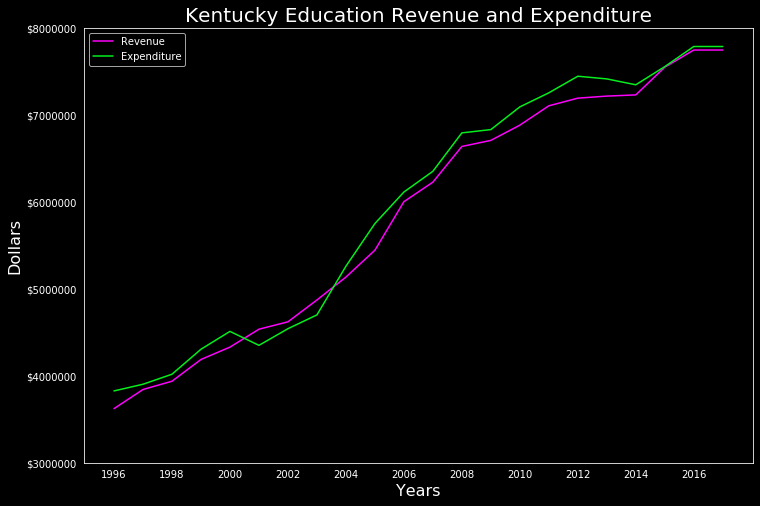

In [8]:
sns.set_style('dark')
plt.style.use('dark_background')

# I will be choosing my home state: Kentucky
ky_df = edu_df2[edu_df2['STATE']=='KENTUCKY']

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(ky_df['YEAR'], ky_df['TOTAL_REVENUE'], color='magenta', label='Revenue')
ax.plot(ky_df['YEAR'], ky_df['TOTAL_EXPENDITURE'], color='#05ef1e', label='Expenditure')
ax.set(xticks=np.arange(1996,2017,2))

formatter = ticker.FormatStrFormatter('$%1.0f')
ax.yaxis.set_major_formatter(formatter)

plt.ylim(3000000, 8000000)
plt.title('Kentucky Education Revenue and Expenditure', fontsize=20)
plt.xlabel('Years', fontsize=16)
plt.ylabel('Dollars', fontsize=16)

plt.legend();

The change in expenditure/revenue in 2001 could be attributed to the KY school system having a new commissioner of education as of the start of the 2000-2001 school year. 

### 4.In your chosen state, which of the lessons are the students more successful, math or reading?

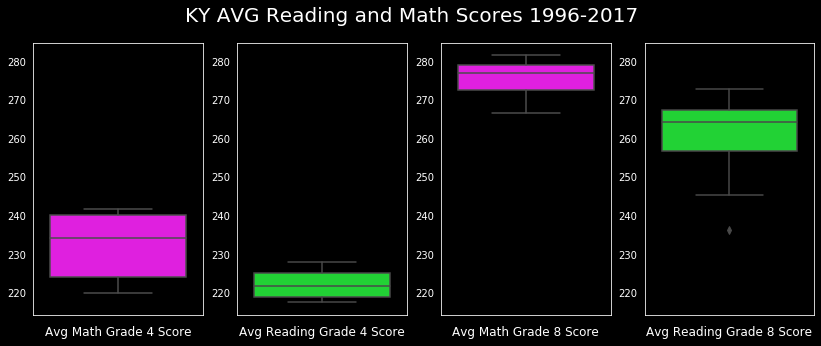

In [9]:
ky_df_scores = ky_df[['AVG_MATH_4_SCORE',	'AVG_MATH_8_SCORE',	'AVG_READING_4_SCORE',	'AVG_READING_8_SCORE']]

ky_df_scores

fig, ax = plt.subplots(1,4, figsize=(14,5))

ax = plt.subplot(1,4,1)
sns.boxplot(y=ky_df_scores['AVG_MATH_4_SCORE'], color='magenta', ax=ax)
ax.set_xlabel('Avg Math Grade 4 Score', fontsize=12)
ax.set_ylabel('')

ax3 = plt.subplot(1,4,2, sharey=ax)
sns.boxplot(y=ky_df_scores['AVG_READING_4_SCORE'], color='#05ef1e')
ax3.set_xlabel('Avg Reading Grade 4 Score', fontsize=12)
ax3.set_ylabel('')

ax2 = plt.subplot(1,4,3, sharey=ax)
sns.boxplot(y=ky_df_scores['AVG_MATH_8_SCORE'], color='magenta', ax=ax2, )
ax2.set_xlabel('Avg Math Grade 8 Score', fontsize=12)
ax2.set_ylabel('')

ax4 = plt.subplot(1,4,4, sharey=ax)
sns.boxplot(y=ky_df_scores['AVG_READING_8_SCORE'], color='#05ef1e', ax=ax4)
ax4.set_xlabel('Avg Reading Grade 8 Score', fontsize=12)
ax4.set_ylabel('');

plt.suptitle('KY AVG Reading and Math Scores 1996-2017', fontsize=20);

Students in grades both 4 and 8 are more proficient in math than reading

### 5. What are the distributions of the math and reading scores in the sample?


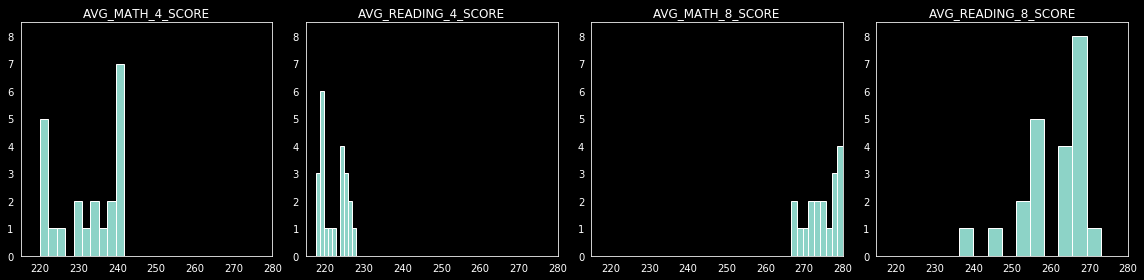

In [10]:
score_cols = ['AVG_MATH_4_SCORE',	'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE',	'AVG_READING_8_SCORE']

plt.figure(figsize=(16,4))

for i, col in enumerate(score_cols):
  plt.subplot(1, len(ky_df_scores.columns), i+1)
  plt.hist(ky_df_scores[col], bins=10)
  plt.xlim(215,280)
  plt.ylim(0,8.5)
  plt.title(f'{col}')

plt.tight_layout()


### 6. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

There actually aren't any missing values because it said at the beginning to get rid of missing values. So i'll use the original df

In [0]:
original_scores = edu_df[['AVG_MATH_4_SCORE',	'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE',	'AVG_READING_8_SCORE']]
cols = ['AVG_MATH_4_SCORE',	'AVG_READING_4_SCORE', 'AVG_MATH_8_SCORE',	'AVG_READING_8_SCORE']

mean_fill_scores = original_scores.copy()
for col in cols:
  mean_fill_scores[col].fillna(mean_fill_scores[col].mean(), inplace=True)

median_fill_scores = original_scores.copy()
for col in cols:
  median_fill_scores[col].fillna(median_fill_scores[col].median(), inplace=True)

interp_fill_scores = original_scores.copy()
for col in cols:
  #edu_df4.loc[:, col] = edu_df4.loc[:, col].interpolate(limit_direction='both')
  interp_fill_scores.loc[:,col].interpolate(limit_direction='both', inplace=True)

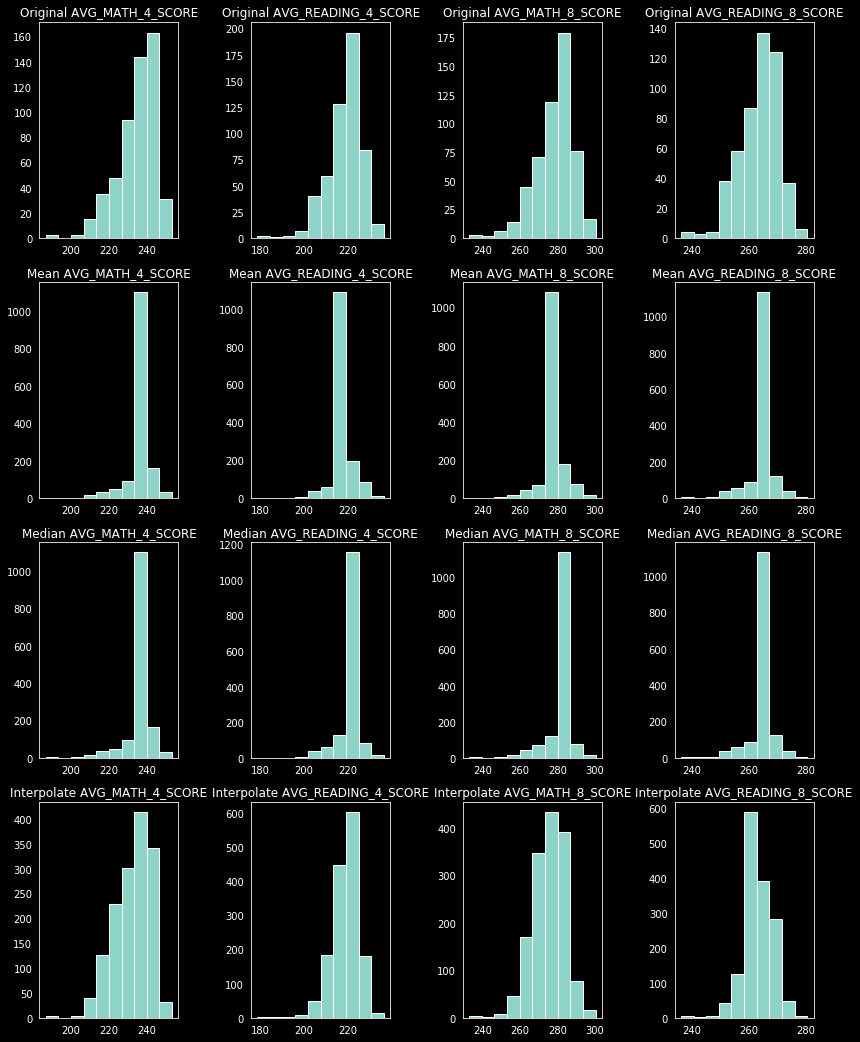

In [65]:
dfs = [mean_fill_scores, median_fill_scores, interp_fill_scores]
df_names = ['mean_fill_scores', 'median_fill_scores', 'interp_fill_scores']

plt.figure(figsize=(12,36))

for i, col in zip(np.arange(0,4), cols):
  plt.subplot(10, 4, i+1)
  plt.hist(original_scores[col])
  plt.title(f'Original {col}')

for i, col in zip(np.arange(4,8), cols):
  plt.subplot(10, 4, i+1)
  plt.hist(mean_fill_scores[col])
  plt.title(f'Mean {col}')

for i, col in zip(np.arange(8,12), cols):
  plt.subplot(10, 4, i+1)
  plt.hist(median_fill_scores[col])
  plt.title(f'Median {col}')

for i, col in zip(np.arange(12,16), cols):
  plt.subplot(10, 4, i+1)
  plt.hist(interp_fill_scores[col])
  plt.title(f'Interpolate {col}')

plt.tight_layout()
plt.show()

Due to the large number of null values in these columns, imputing measures of central tendency changes the distributions quite dramatically. Interpolation seems to be the best route, but its not perfect. Potentially dropping all nulls might be the best idea.